<a href="https://colab.research.google.com/github/Mustafasohail7/Capstone/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Parameters

In [11]:
start_date = "2024-05-11"
end_date = ""
coords_file = 'testing_coords.txt'
method = 'NDWI'
cloud_cover = 10
threshold = 0.05

### Setting Up Dependencies

In [12]:
!pip install landsatxplore numpy scipy matplotlib rasterio --quiet 2> /dev/null

In [13]:
!rm -r /content/src

In [14]:
!wget -P src/api/ -nc "https://github.com/Mustafasohail7/Capstone/raw/main/API/searchScene.py"
!wget -P src/api/ -nc "https://github.com/Mustafasohail7/Capstone/raw/main/API/landsat.py"
!wget -P src/api/ -nc "https://github.com/Mustafasohail7/Capstone/raw/main/API/utils.py"
!wget -nc "https://github.com/Mustafasohail7/Capstone/raw/main/API/co-ords.txt"
!wget -nc "https://github.com/Mustafasohail7/Capstone/raw/main/API/testing_coords.txt"
!wget -P src/algos/ -nc "https://github.com/Mustafasohail7/Capstone/raw/main/vanilla/process.py"
!wget -P src/algos/ -nc "https://github.com/Mustafasohail7/Capstone/raw/main/vanilla/main_helper.py"
!wget -P src/algos/ -nc "https://github.com/Mustafasohail7/Capstone/raw/main/vanilla/find_files.py"

--2024-05-11 06:51:41--  https://github.com/Mustafasohail7/Capstone/raw/main/API/searchScene.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Mustafasohail7/Capstone/main/API/searchScene.py [following]
--2024-05-11 06:51:42--  https://raw.githubusercontent.com/Mustafasohail7/Capstone/main/API/searchScene.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2845 (2.8K) [text/plain]
Saving to: ‘src/api/searchScene.py’

searchScene.py      100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-05-11 06:51:42 (25.9 MB/s) - ‘src/api/searchScene.py’ saved [2845/2845]

--2024-05-11 06:51:42-

### Downloading Scene Files

In [17]:
import sys
sys.path.append('/content/src/api')
from searchScene import searchScene

searchScene(coords_file,cloud_cover,method,start_date,end_date)

Directory downloads successfully deleted.
coordinate: 1 out of 1
First Scene Acquired for 2022-07-21
--------------------------
Second Scene Acquired for 2022-07-05
--------------------------
Download options found
--------------------------
Products available to download:  8
--------------------------
All downloads available
--------------------------
testing
requesting session
https://landsatlook.usgs.gov/data/collection02/level-2/standard/oli-tirs/2022/150/034/LC08_L2SP_150034_20220705_20220708_02_T1/LC08_L2SP_150034_20220705_20220708_02_T1_SR_B3.TIF?requestSignature=eyJkb3dubG9hZEFwcCI6Ik0yTSIsImNvbnRhY3RJZCI6MjY4ODc5MzMsImRvd25sb2FkSWQiOjYyMTUzMDE4NiwiZGF0ZUdlbmVyYXRlZCI6IjIwMjQtMDUtMTFUMDI6NDQ6MjktMDU6MDAiLCJpZCI6IkxDMDhfTDJTUF8xNTAwMzRfMjAyMjA3MDVfMjAyMjA3MDhfMDJfVDFfU1JfQjMuVElGIiwic2lnbmF0dXJlIjoiJDUkJElJTFZwXC9tYmhDY3Z0YjExV2hyWDNUdjBhRUlDdWhhNzQ5a1F1Wk1VZTI4In0=
got response
downloading from here
File downloaded successfully.
--------------------------
testing
requesting ses

### Processing Images

Found 2 subdirectories in the downloads folder.
saving in <built-in function dir>


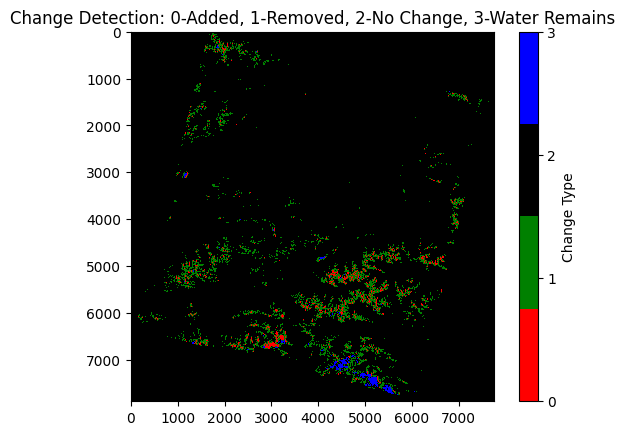

file saved
Net water change: 0.8287641000000001 km^2


In [18]:
%matplotlib inline
import sys
sys.path.append('/content/src/algos')

from process import process
from find_files import find

file_paths = find()

for i in range(0,len(file_paths),2):
    process(file_paths[i], file_paths[i+1], method, threshold, False)
